# <font   size="5" face="Segoe Script" color = 'salmon'> Lab3 
# Student ID - 8944245  </font>

**Part A:**

Problem Statement: Consider the dataset Credit Card Fraud Detection from Kaggle and build a machine-learning model that detects whether a credit card transaction is fraudulent. Demonstrate the steps of data preprocessing and analysis, consider applying train (0.7) and test (0.3), using the logistic regression to build the model, and evaluate to determine the accuracy.


### <font color = '#1e90ff'> <u> _**Problem Statement**_  </u> </font> <br>
The main objective is to develop a machine learning model that can accurately classify credit card transactions as either fraudulent or non-fraudulent based on the available features. This is a binary classification problem, where the model needs to learn patterns and relationships in the data to differentiate between genuine and fraudulent transactions.

In [510]:
# Import libraries 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, f1_score

In [511]:
# Loading the dataset
df = pd.read_csv("C://Users//krath//OneDrive//Documents//Cluster2023//Artificial Intelligence Algorith//Lab3//creditcard.csv")
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


 ### <font color = '#1e90ff'> <u> _**- Data Preprocessing**_  </u> </font> <br>

In [512]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [513]:
df.shape

(284807, 31)

In [514]:
df.columns 

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [515]:
# statistical info
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [516]:
# Check the null values 
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [517]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [518]:
df.drop_duplicates(inplace=True)

In [519]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


> <b> <i> We observe a significant class imbalance in our original dataset, where the majority of transactions are non-fraudulent. Utilizing this dataset as the foundation for building predictive models may result in substantial errors, as our algorithms could potentially overfit by assuming that the majority of transactions are not fraudulent. However, our primary objective is to develop a model that identifies patterns indicative of fraud rather than making assumptions. Therefore, it is imperative to address this class imbalance issue to enhance the model's ability to accurately detect fraudulent transactions while avoiding false assumptions.</b> </i>


### <font color = '#1e90ff'> <u> _**- Exploratory Data Analysis**_  </u> </font> 

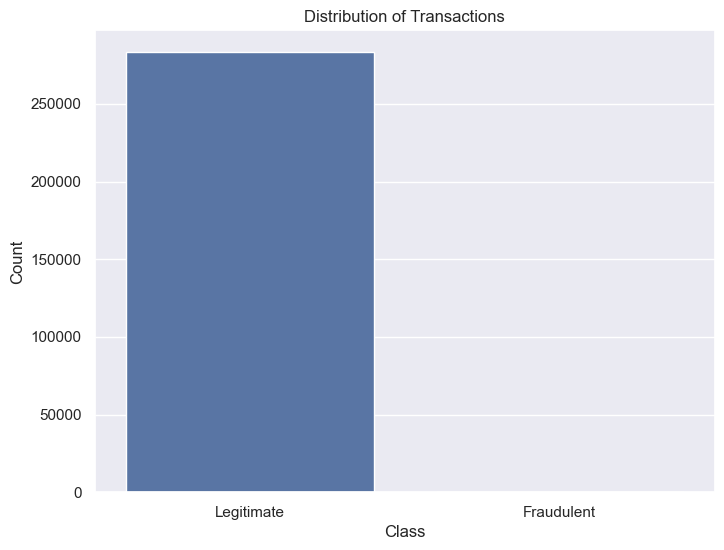

In [520]:
# Plot the distribution of 'Class' using sns.countplot()
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Class')
plt.xticks([0, 1], ['Legitimate', 'Fraudulent'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Transactions')
plt.show()

C:\Users\krath\AppData\Local\Temp\ipykernel_33368\1766143203.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_temp[col], ax=ax[index])
C:\Users\krath\AppData\Local\Temp\ipykernel_33368\1766143203.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_temp[col], ax=ax[index])
C:\Users\krath

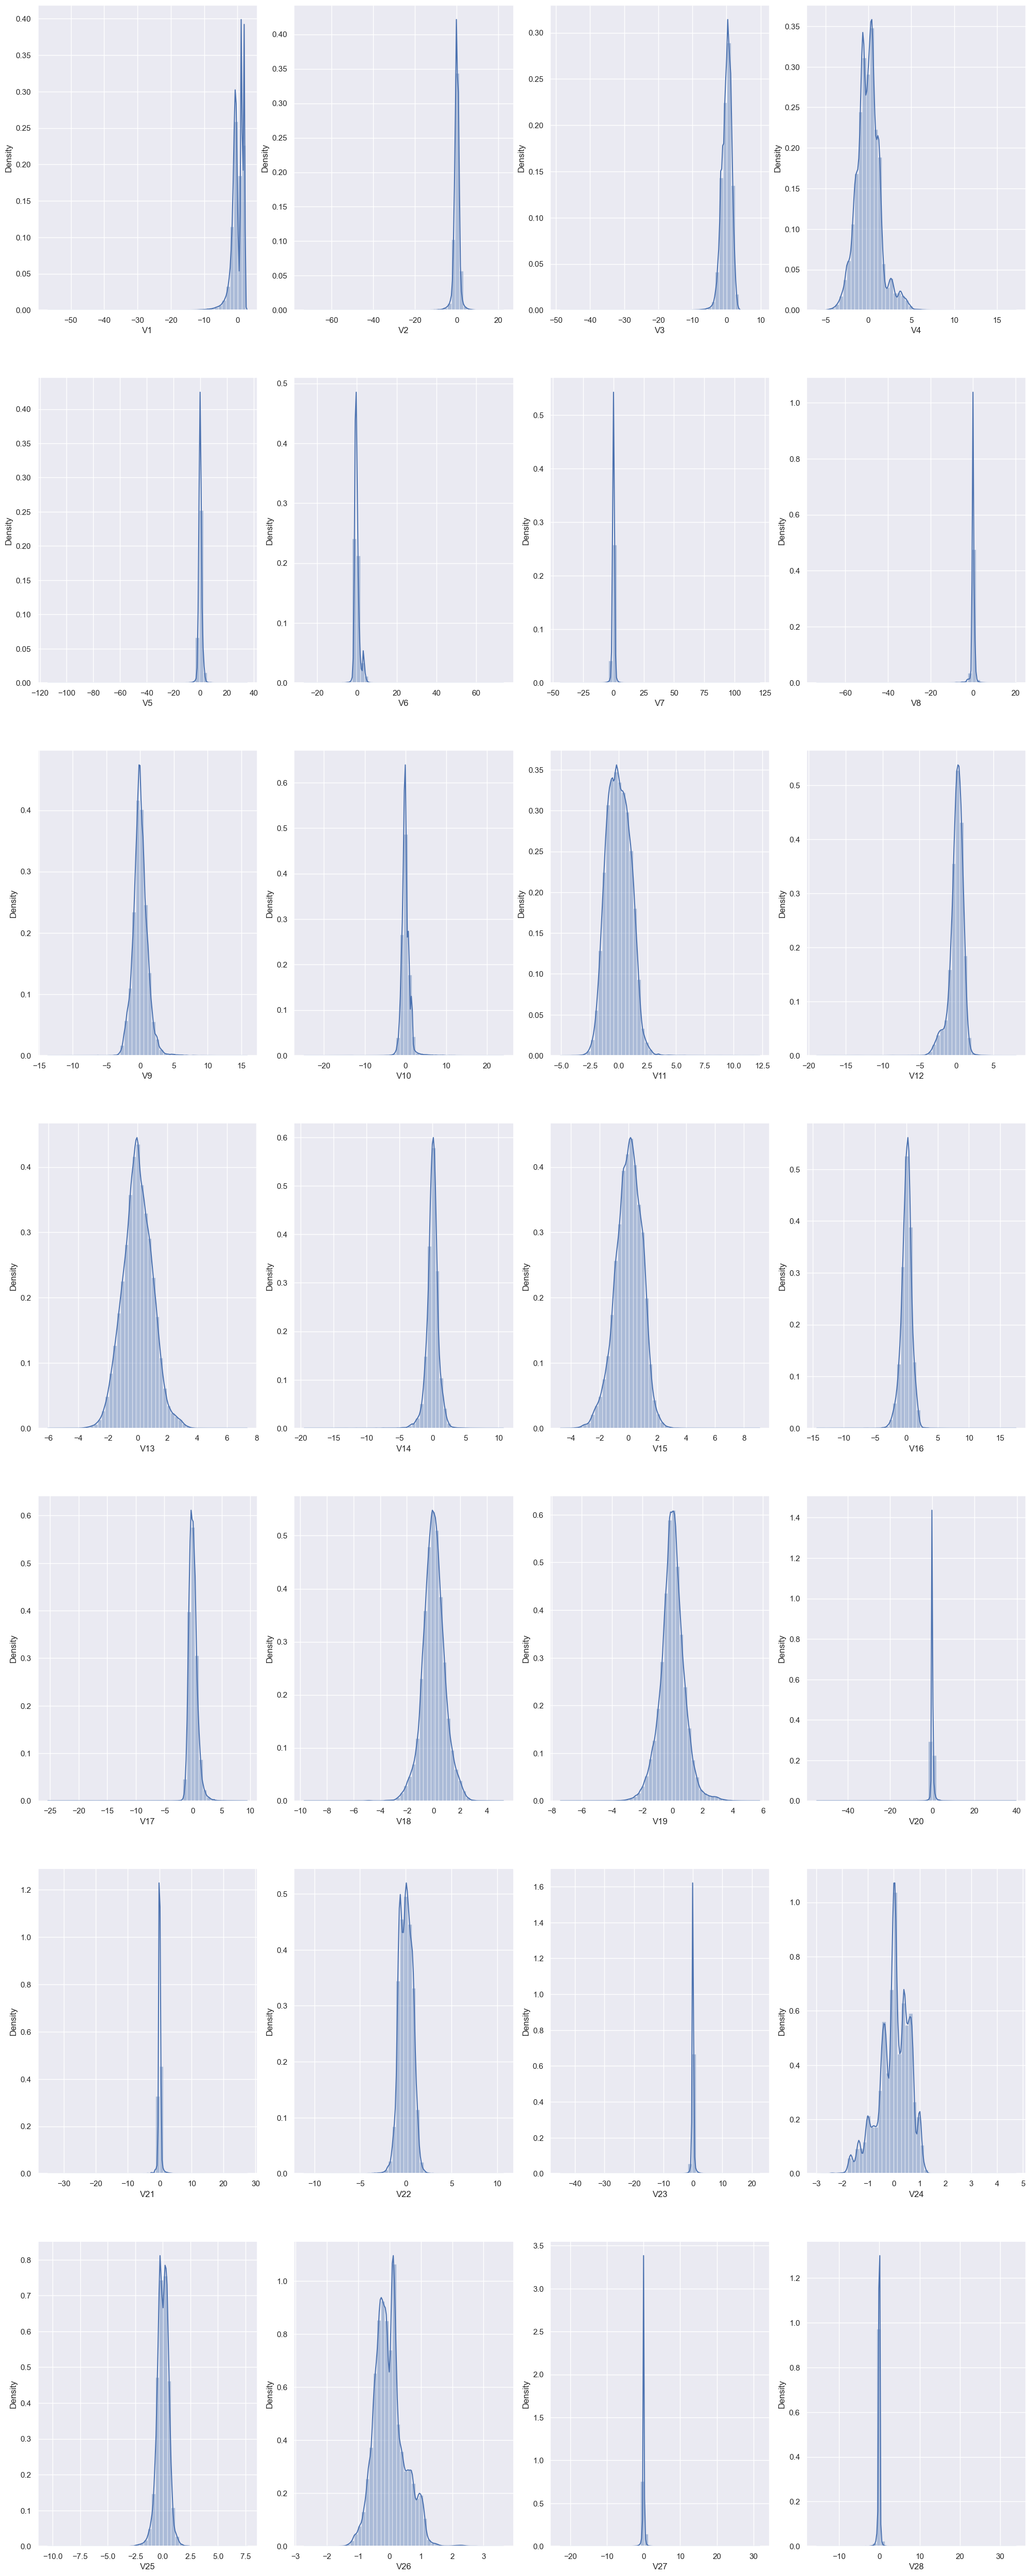

In [521]:
df_temp = df.drop(columns=['Time', 'Amount', 'Class'], axis=1)
# create dist plots
fig, ax = plt.subplots(ncols=4, nrows=7, figsize=(20, 50))
index = 0
ax = ax.flatten()

for col in df_temp.columns:
    sns.distplot(df_temp[col], ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5)

####  <font color = '#5072a7'> <u> _**Coorelation Matrix**_ </u> </font>

<Axes: >

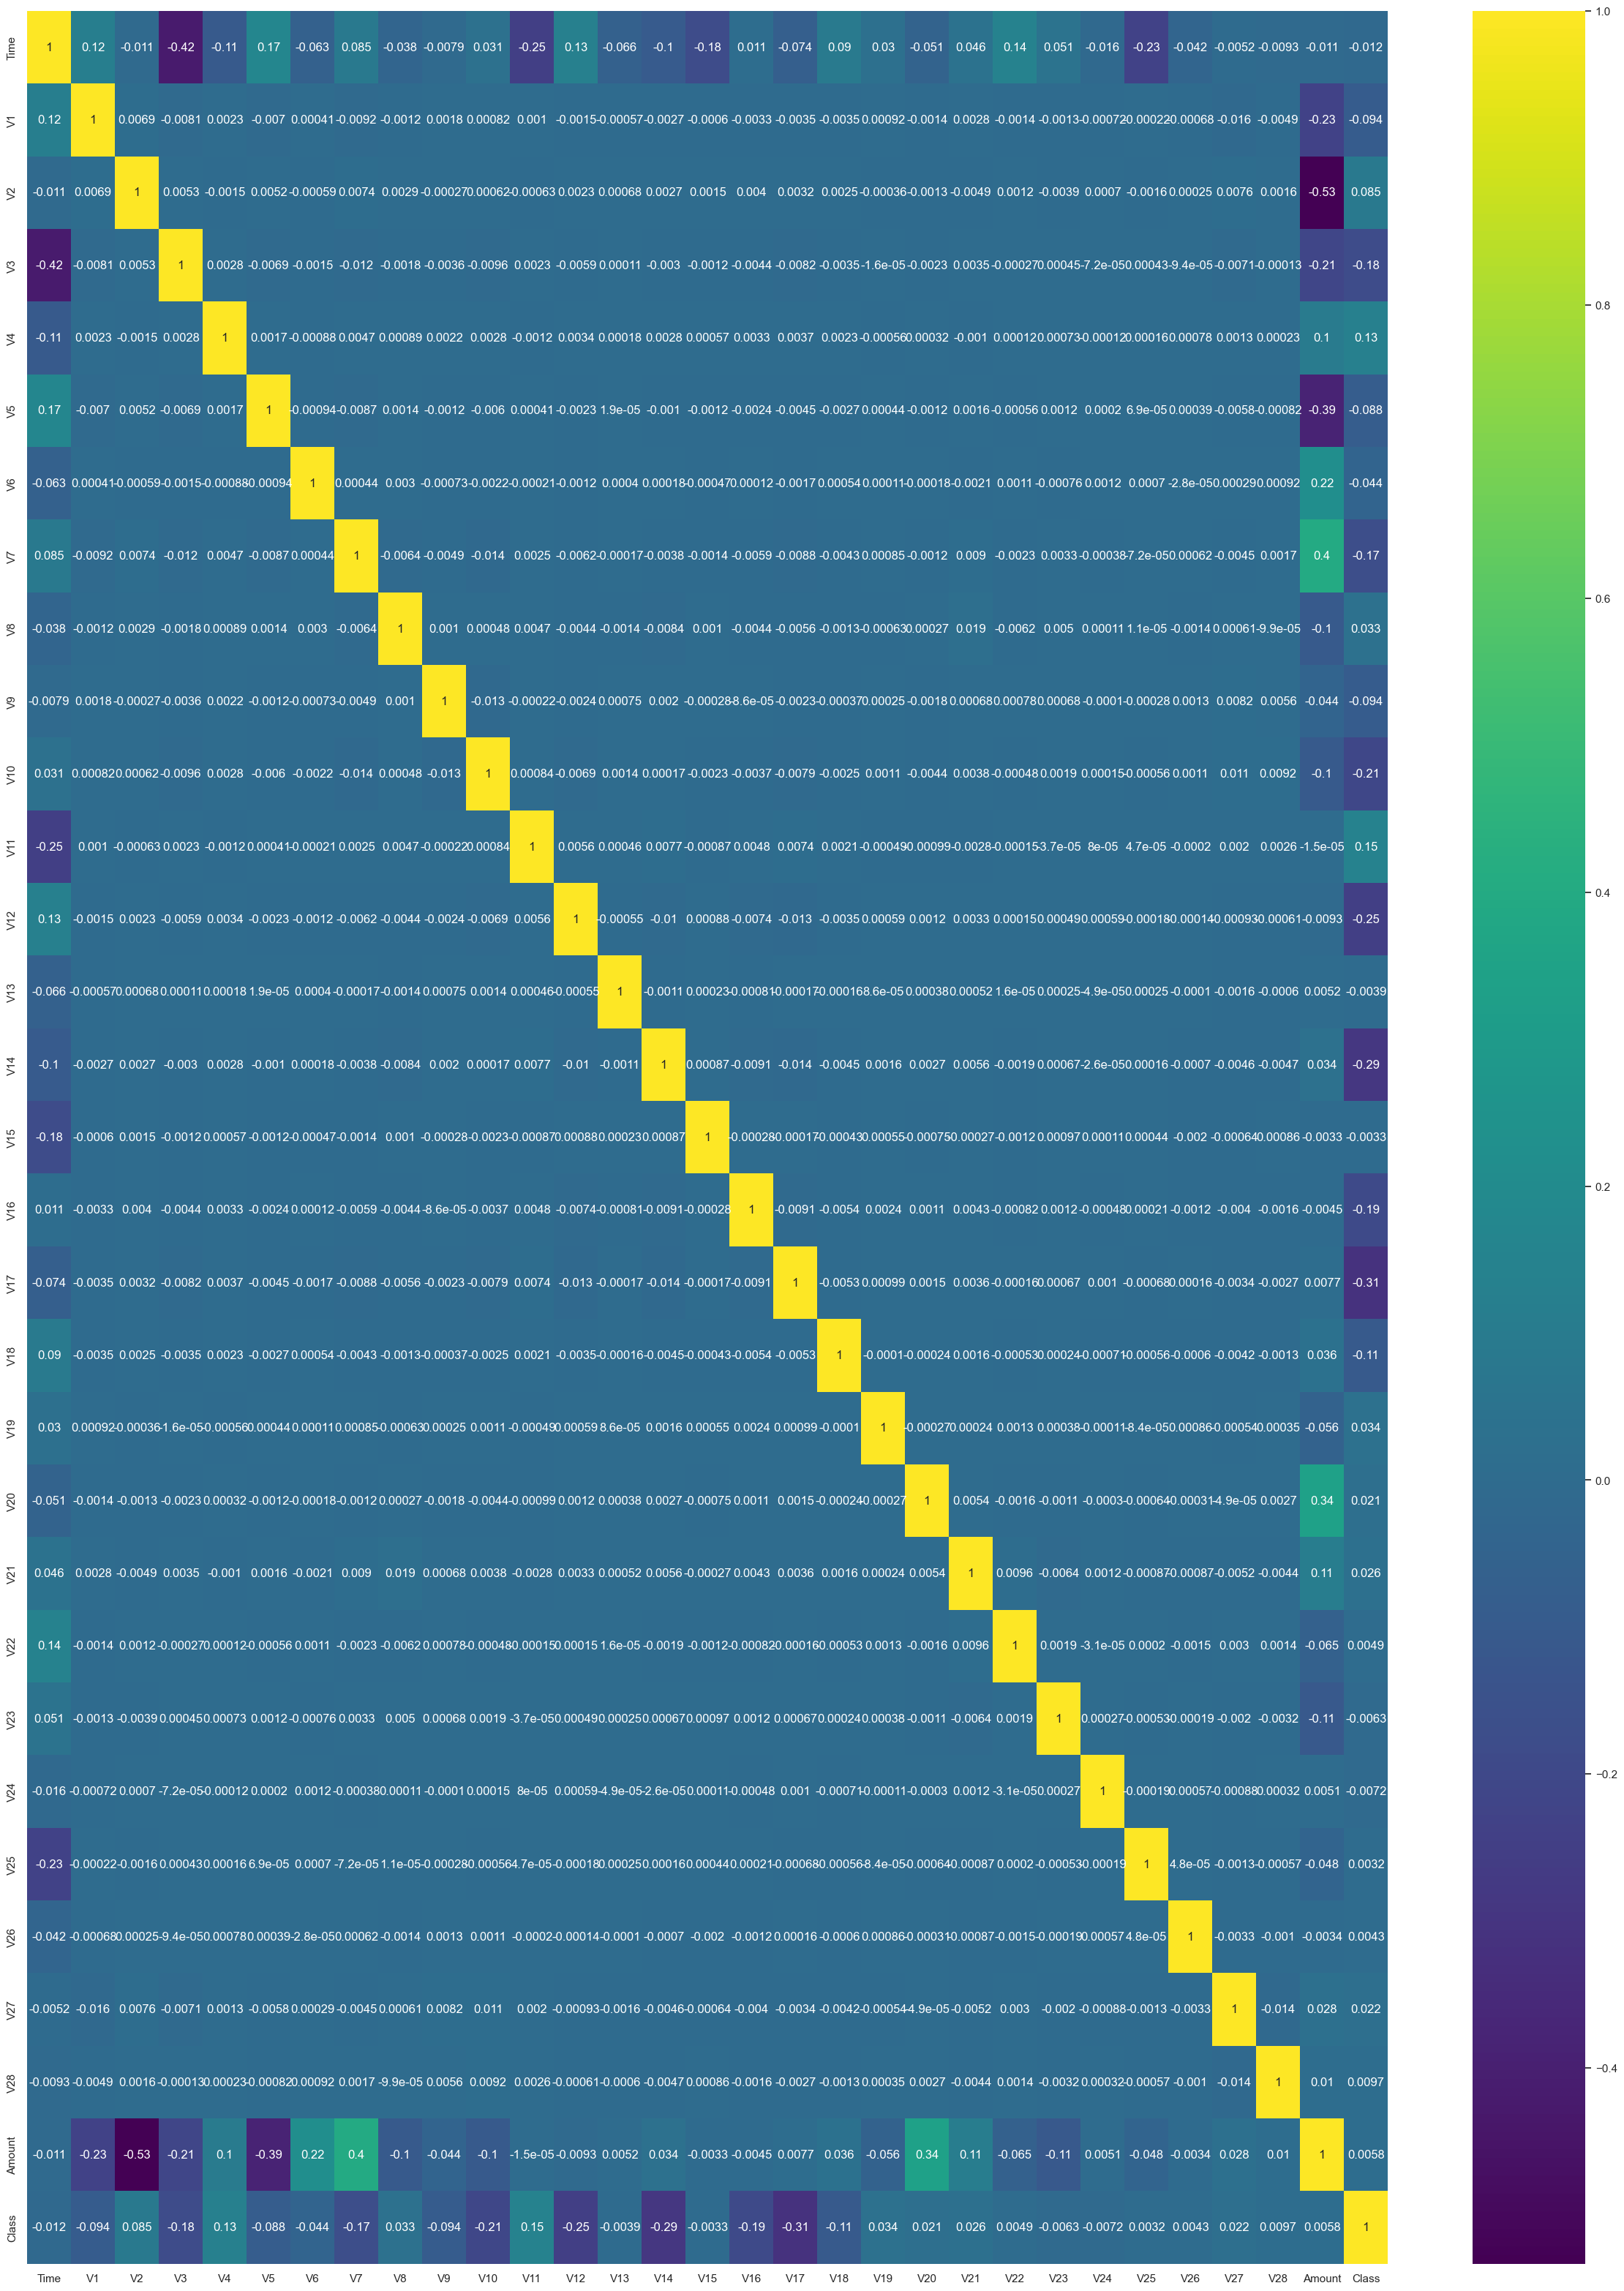

In [522]:
corr = df.corr()
plt.figure(figsize=(30,40))
sns.heatmap(corr, annot=True, cmap='viridis')

In [523]:
# Compare the values for both transactions to observe the average differences in feature values between the two classes
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


### <font color = '#1e90ff'> <u> _**Standard Scaling**_  </u> </font> 


> <b> <i>As the majority of our data has already been scaled, we now need to scale the remaining columns that are left to be scaled, which are Amount and Time </b> </i>

C:\Users\krath\AppData\Local\Temp\ipykernel_33368\3028048997.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_val, ax=ax[0], color='r')
C:\Users\krath\AppData\Local\Temp\ipykernel_33368\3028048997.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time_val, ax=ax[1], color='b')


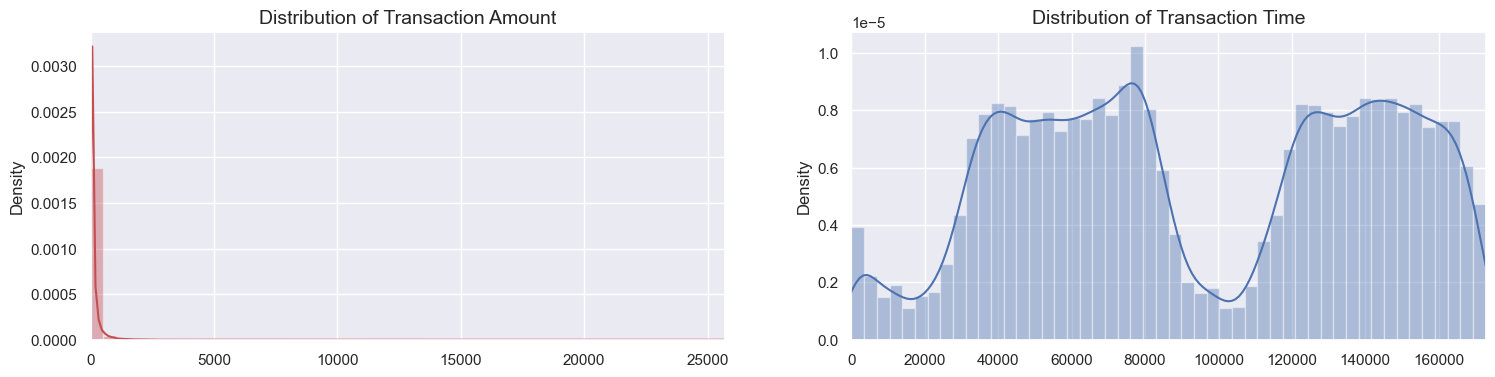

In [524]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

> <b>  As long as we have extreme values in both columns[ 'Amount', Time'], I'll use RobustScaler as long as it is less prone and more robust to outliers <b>

In [525]:
from sklearn.preprocessing import  RobustScaler
rob_scaler = RobustScaler()
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time','Amount'], axis=1, inplace=True)

In [526]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'scaled_amount', 'scaled_time'],
      dtype='object')

> When dealing with imbalanced data, it is advisable to consider a combination of methods for the most effective approach. In this scenario, a combination of under-sampling the majority class and using SMOTE to over-sample the minority class could be implemented. The crucial aspect is to experiment and evaluate different techniques to determine which method enhances the model's performance on the minority class while maintaining overall good performance.

####  <font color = '#5072a7'> <u> _**Under-Sampling**_ </u> </font>
>Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions <br>
>Number of Fraudulent Transactions --> 473

In [527]:
# separating the data for analysis
legitimate = df[df.Class == 0]
fraud = df[df.Class == 1]
print(legitimate.shape)
print(fraud.shape)

(283253, 31)
(473, 31)


In [528]:
legit_sample = legitimate.sample(n=473)


In [529]:

# Concatenating two DataFrames #
new_data = pd.concat([legit_sample, fraud], axis=0)
new_data.Class.value_counts()


Class
0    473
1    473
Name: count, dtype: int64

In [530]:
new_data.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time
Class,,,,,,,,,,,,,,,,,,,,,
0,0.104604,0.006688,0.125862,0.031568,-0.024110,-0.020007,-0.020484,-0.010355,0.038951,-0.021424,...,-0.011518,-0.000117,0.027131,0.030480,-0.011030,0.006052,-0.010127,-0.012213,0.727275,0.100486
1,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,-5.453274,...,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,1.416658,-0.049851


In [531]:
X = new_data.drop(columns='Class', axis=1)
y = new_data['Class']

In [532]:
print(X)

              V1        V2        V3        V4        V5        V6        V7  \
174314  0.016038  1.121141 -0.622800 -0.628149  1.932678 -0.462506  1.692372   
276869  0.141915  0.729131 -0.491787 -0.573891  1.111150 -0.882022  1.560198   
240624  2.363477 -1.133561 -1.741033 -1.930342 -0.419097 -0.475962 -0.726779   
173920 -3.626962 -5.790181  0.642301  2.275985  5.752470 -2.628261 -4.181447   
222161  1.953486 -0.044294 -1.881126  0.375540  0.282987 -0.936886  0.137562   
...          ...       ...       ...       ...       ...       ...       ...   
279863 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494 -0.882850   
280143  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536 -1.413170   
280149 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346 -2.234739   
281144 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548 -2.208002   
281674  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695  0.223050   

              V8        V9       V10  .

In [533]:
print(y)

174314    0
276869    0
240624    0
173920    0
222161    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 946, dtype: int64



### <font color = '#1e90ff'> <u> _**- Split the data into Training data & Testing Data**_  </u> </font> 

In [534]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state= 25)

In [535]:
print(X.shape, X_train.shape, X_test.shape)

(946, 30) (662, 30) (284, 30)


In [536]:
# Training the Logistic Regression Model with Training Data #
from sklearn.model_selection import cross_val_score
model = LogisticRegression()
model.fit(X_train, y_train)
# Perform cross-validation with 5 folds
cv_scores = cross_val_score(model, X, y, cv=5)
# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())


Cross-validation scores: [0.90526316 0.92592593 0.91534392 0.93650794 0.92592593]
Mean CV score: 0.921793372319688


In [537]:
# Accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [538]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9425981873111783


In [539]:

# Testing
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       142
           1       0.98      0.92      0.95       142

    accuracy                           0.95       284
   macro avg       0.96      0.95      0.95       284
weighted avg       0.96      0.95      0.95       284

F1 Score: 0.9527272727272726


> Our model has a good performance, it shows promising performance with high precision, recall, and F1-score for both classes. The F1-score of 0.95 indicates that the model is well-balanced in terms of precision and recall and is capable of making accurate predictions for both classes.



####  <font color = '#5072a7'> <u> _**Oversampling to balance the class distribution**_ </u> </font>

In [540]:
x = df.drop(columns='Class', axis=1)
Y = df['Class']

x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.3, stratify=Y, random_state=20)


In [541]:

from imblearn.over_sampling import SMOTE
over_sample = SMOTE()
x_smote, Y_smote = over_sample.fit_resample(x_train, Y_train)
print(Y_smote.value_counts())

Class
0    198277
1    198277
Name: count, dtype: int64


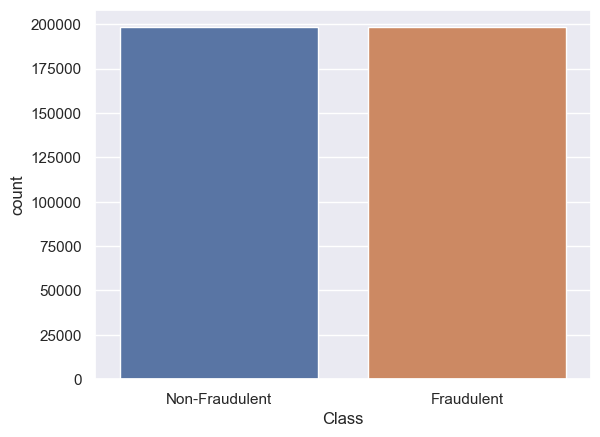

In [542]:
# Create a DataFrame from the resampled target variable
y_smote_df = pd.DataFrame(Y_smote, columns=['Class'])

# Plot the countplot
sns.countplot(x='Class', data=y_smote_df)
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])
plt.show()

In [543]:

# Training
model.fit(x_smote, Y_smote)
# Testing
Y_pred = model.predict(x_test)
print(classification_report(Y_test, Y_pred))
print("F1 Score:",f1_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     84976
           1       0.05      0.92      0.10       142

    accuracy                           0.97     85118
   macro avg       0.53      0.94      0.54     85118
weighted avg       1.00      0.97      0.98     85118

F1 Score: 0.1018409714061888


> SMOTE Results <br>
Precision for the minority class (fraudulent) is low (0.05), indicating that the model has a high rate of false positives for the minority class.
Recall for the minority class is high (0.92), indicating that the model has a high rate of true positives for the minority class.
The F1-score for the minority class is low (0.10), indicating that the model's performance for the minority class is poor and heavily influenced by the low precision.
The accuracy is 97%, which is a good overall measure of model performance, but the F1-score for the minority class suggests that the model is not effectively identifying the minority class instances.  <br>


<u> <b> <i> Conclusion: </i> </b> </u>  <br>
> In this specific scenario, undersampling appears to be the more effective approach for dealing with the imbalanced data. It is essential to consider both precision and recall (and consequently the F1-score) when evaluating the performance of the model, especially in the context of imbalanced data.

**Part B:**

Problem Statement: Use the following insurance dataset and build a predictive system to predict insurance costs. Demonstrate the steps of data preprocessing and analysis, consider applying train (0.7) and test (0.3), using linear regression to build the model, and evaluate the accuracy of predicting the insurance cost.




### <font color = '#1e90ff'> <u> _**Problem Statement**_  </u> </font> <br>
This project aims to create a powerful machine learning model capable of predicting insurance costs for individuals using key variables such as age, gender, BMI, smoking habits, and region. By analyzing historical data on insurance charges from a diverse group of individuals, the goal is to construct a reliable predictive model. The successful implementation of this model will provide valuable support to insurance companies in accurately estimating premiums for prospective customers. Ultimately, the project seeks to improve pricing accuracy, enhance customer satisfaction, and streamline the insurance underwriting process.

In [544]:
# Loading the dataset
insurance_df = pd.read_csv("C://Users//krath//OneDrive//Documents//Cluster2023//Artificial Intelligence Algorith//Lab3//insurance.csv")
insurance_df.head(4)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061


### <font color = '#5072a7'> <u> _**- Data preprocessing**_  </u> </font> <br>

In [545]:
insurance_df.shape

(1338, 7)

In [546]:
# getting some information about the dataset
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [547]:
# checking for missing values
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [548]:
# statistical Measures of the dataset
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [549]:
insurance_df.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [550]:
insurance_df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [551]:
# Remove duplicates 
insurance_df.drop_duplicates(inplace=True)

####  <font color = '#5072a7'> <u> _**- Exploratory Data Analysis**_ </u> </font>

C:\Users\krath\AppData\Local\Temp\ipykernel_33368\1018197166.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_df['age'])


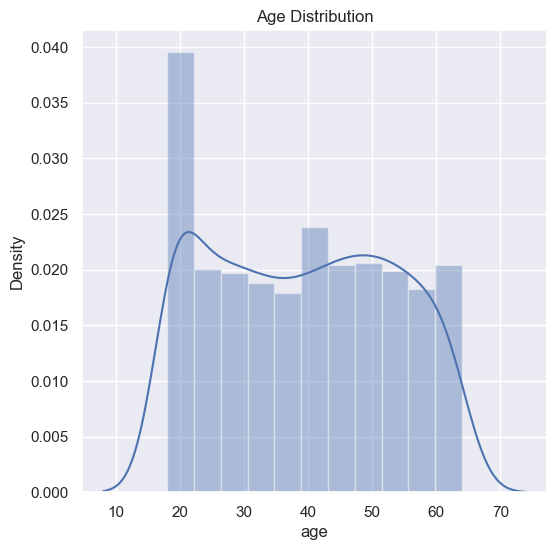

In [552]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_df['age'])
plt.title('Age Distribution')
plt.show()

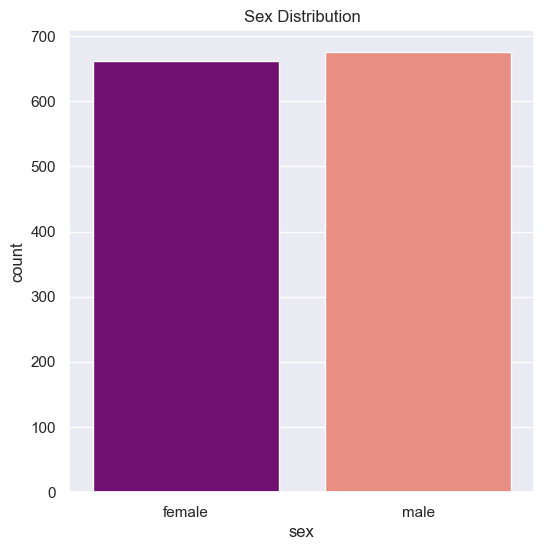

In [553]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_df,palette=['purple', 'salmon'])
plt.title('Sex Distribution')
plt.show()

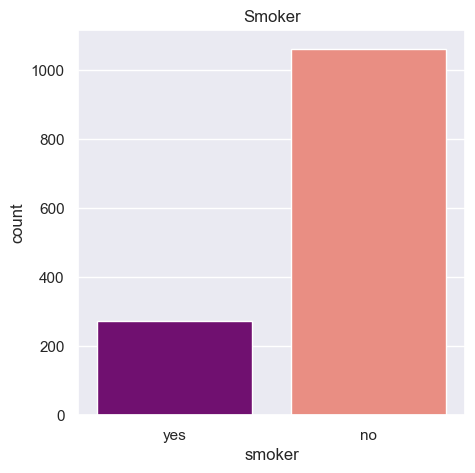

In [554]:
plt.figure(figsize=(5,5))
sns.countplot(x='smoker', data=insurance_df, palette=['purple', 'salmon'])
plt.title('Smoker')
plt.show()


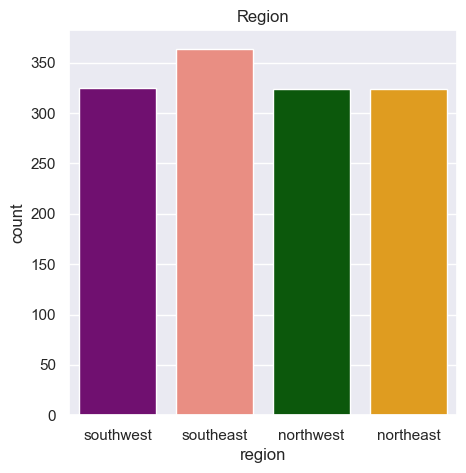

In [555]:
plt.figure(figsize=(5,5))
sns.countplot(x='region', data=insurance_df,palette = ['purple','salmon','darkgreen','Orange'] )
plt.title('Region')
plt.show()

Text(0.5, 1.0, 'Cost vs Region')

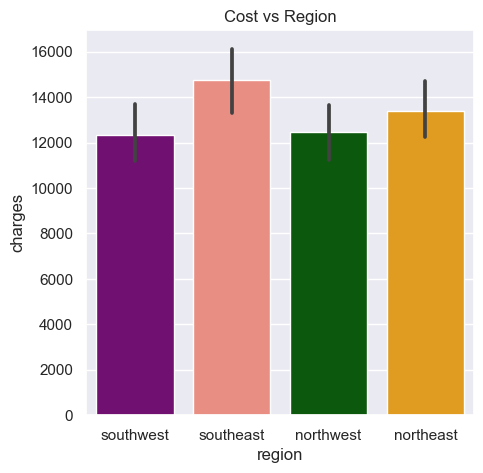

In [556]:
plt.figure(figsize=(5,5))
sns.barplot(x='region', y='charges', data=insurance_df, palette = ['purple','salmon','darkgreen','Orange'])
plt.title('Cost vs Region')

Text(0.5, 1.0, 'Charges for smokers')

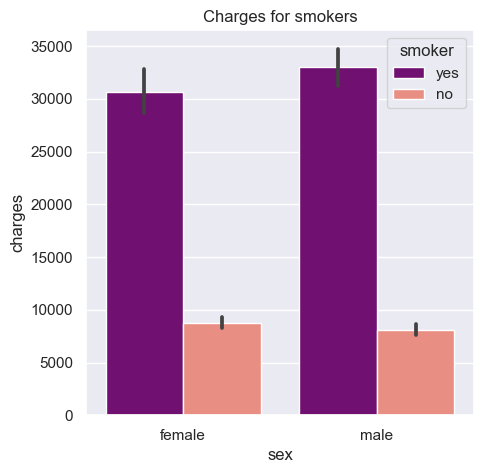

In [557]:
plt.figure(figsize=(5,5))
sns.barplot(x='sex', y='charges',hue='smoker', data=insurance_df, palette = ['purple','salmon','darkgreen','Orange'])
plt.title('Charges for smokers')

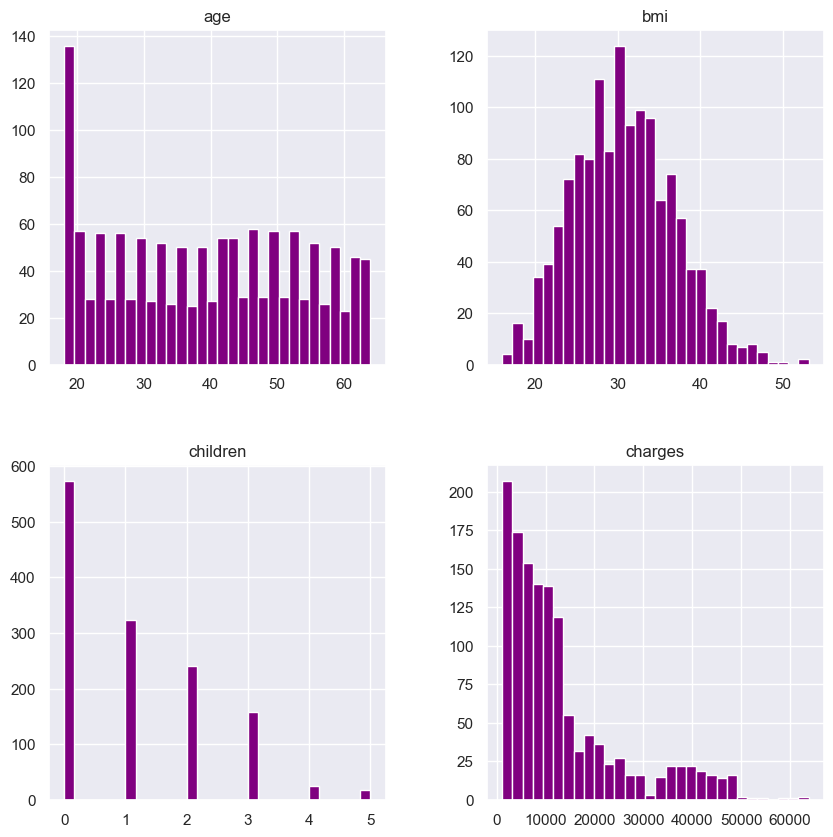

In [558]:
insurance_df[['age','bmi','children','charges']].hist(bins=30, figsize=(10,10), color='purple')
plt.show()


####  <font color = '#5072a7'> <u> _**- Encoding the categorical features**_ </u> </font>

In [559]:
# encoding sex column
insurance_df.replace({'sex':{'male':0,'female':1}}, inplace=True)

 # encoding 'smoker' column
insurance_df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column 
insurance_df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [560]:
insurance_df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,0,1,16884.9240
1,18,0,33.77,1,1,0,1725.5523
2,28,0,33.00,3,1,0,4449.4620


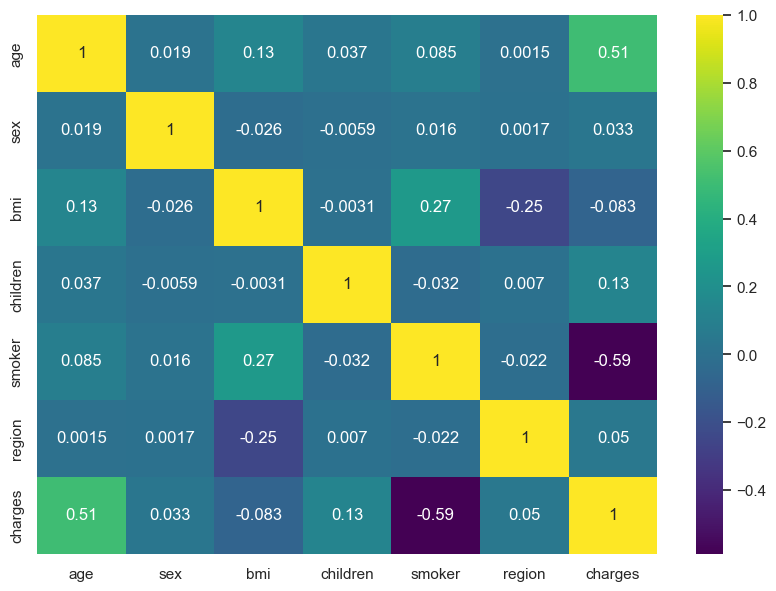

In [561]:
plt.figure(figsize=(10,7))
sns.heatmap(insurance_df_no_out.corr(), annot = True, cmap= 'viridis')
plt.show()

In [562]:
X = insurance_df.drop(['charges'], axis=1)
y = insurance_df.charges


In [563]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1337 rows x 6 columns]


In [564]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64



####  <font color = '#5072a7'> <u> _**-Splitting the Features train and test**_ </u> </font>

In [565]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=8)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shpae: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (935, 6)
X_test shape:  (402, 6)
y_train shpae:  (935,)
y_test shape:  (402,)


In [566]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
linreg = LinearRegression()


In [567]:
# Training the model 
linreg.fit(X_train, y_train)

LinearRegression()


####  <font color = '#5072a7'> <u> _**- Model Evaluation**_ </u> </font>

In [568]:
# prediction on training data
train__pred =linreg.predict(X_train)

In [569]:

r2_train = metrics.r2_score(y_train, train__pred)
print('R squared value : ' + str(round(r2_train * 100, 2)) + '%')  

R squared value : 74.83%


In [570]:
test_pred = linreg.predict(X_test)

In [571]:
# R squared value
r2_test = metrics.r2_score(y_test, test_pred)
print('R squared value : ' + str(round(r2_test * 100, 2)) + '%')


R squared value : 75.05%


In [572]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("R-squared:", r2_test)
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, test_pred)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, test_pred))}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, test_pred)}")

R-squared: 0.7504514941313325
Mean Squared Error (MSE): 38305200.3385568
Root Mean Squared Error (RMSE): 6189.119512382743
Mean Absolute Error (MAE): 4322.877767517933


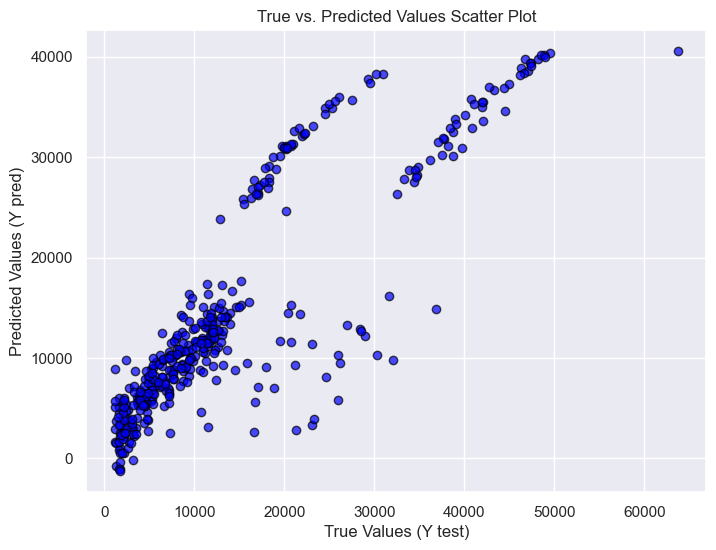

In [573]:

# Scatter plot of y_test vs. test_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_pred, c='blue', marker='o', edgecolors='black', alpha=0.7)
plt.xlabel('True Values (Y test)')
plt.ylabel('Predicted Values (Y pred)')
plt.title('True vs. Predicted Values Scatter Plot')
plt.grid(True)

> <b>  <u> <i> Conclusion :  </i> </u> </b> <br>
>The predictive model for insurance costs performs well with an R-squared value of 0.75 (75%), indicating that 75% of the variance in insurance costs is explained by the model's features. The model's predictions are reasonably accurate, as evidenced by the low Root Mean Squared Error (RMSE) of 6189.12 and Mean Absolute Error (MAE) of 4322.88. These metrics show that the model's predictions are close to the actual insurance costs.


####  <font color = '#5072a7'> <u> _**Building a Predictive System**_ </u> </font>


In [574]:
input_data = {'age':31, 'sex':1,'bmi':25.74, 'children':0, 'smoker':1, 'region':3}
index = [0]
cust_df = pd.DataFrame(data, index)
cust_df

,age,sex,bmi,children,smoker,region
0,31,1,25.74,0,1,3


In [575]:
cost_pred = linreg.predict(cust_df)
print("The medical insurance cost of the new customer is: ", cost_pred)

The medical insurance cost of the new customer is:  [5039.41526088]
